# Importing all required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sea

In [2]:
store = pd.read_csv("stores_wall.csv")
train = pd.read_csv("train_wall.csv")
features = pd.read_csv("features_wall.csv")
store_dummy = pd.read_csv("stores_wall2.csv")

In [3]:
stotures = pd.merge(features,store, on="Store", how='inner')

In [4]:
stotures

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,6/28/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,7/5/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,7/12/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,7/19/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [5]:
combine = pd.merge(train,stotures)
combine

#Now combining the whole files required for analysis and storing in combine

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2/5/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2/5/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2/5/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2/5/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2/5/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,10/26/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,10/26/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,10/26/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,10/26/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [6]:
combine.isnull().mean()*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

### Obervation1 : Around 70% of the values are Null for MarkDown(1-5)

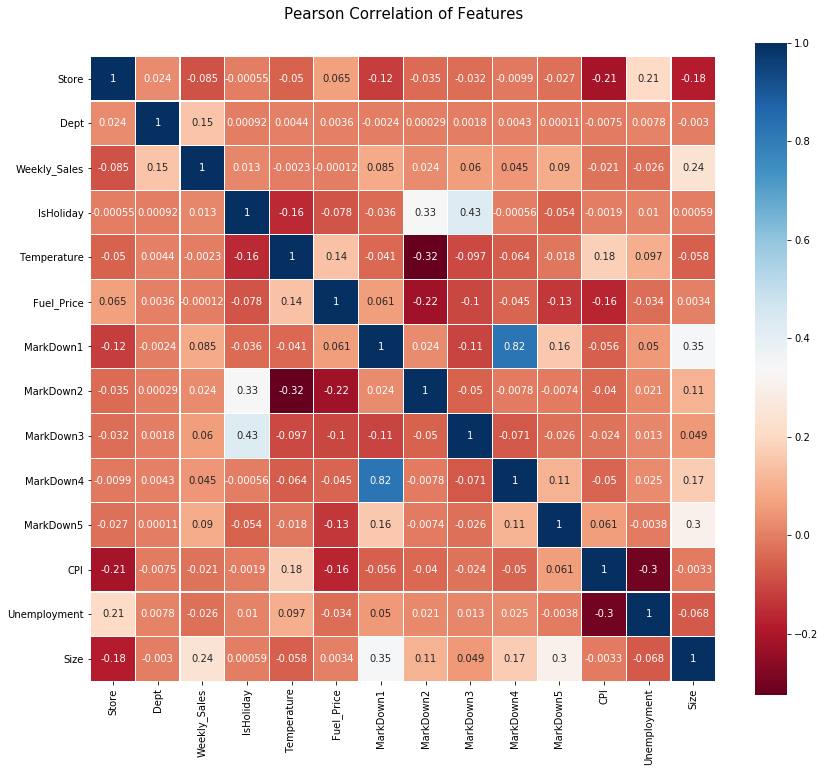

In [7]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sea.heatmap(combine.drop(["Date","Type"],axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
#calculating the correlation for dropping un-necessary features

### Observation2 : Markdown(1-5) have less correlation with Sales and taking Null values into consideration We      can drop it.           

### Observation3 : Features Like Unemployment, CPI, Fuel_Price, Temperature, even IsHoliday have less correlation we will justify each of these features below

In [8]:
combine.Date = pd.to_datetime(combine.Date)
combine['Week'] = combine.Date.dt.week 
combine['Year'] = combine.Date.dt.year
combine

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012


# Analysis on Features having Less Correlation

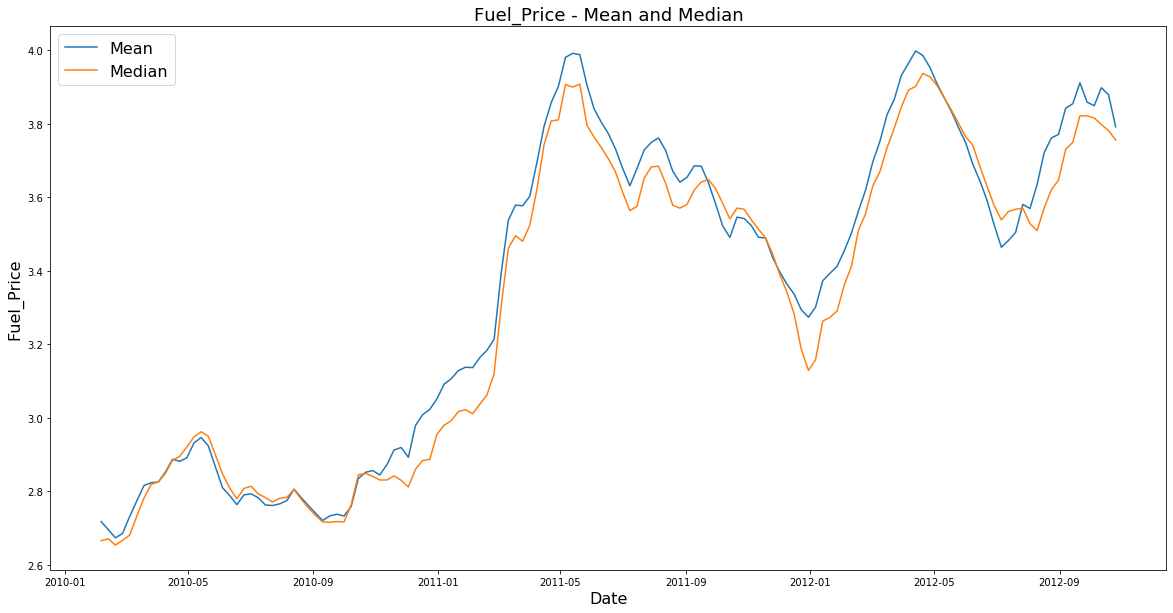

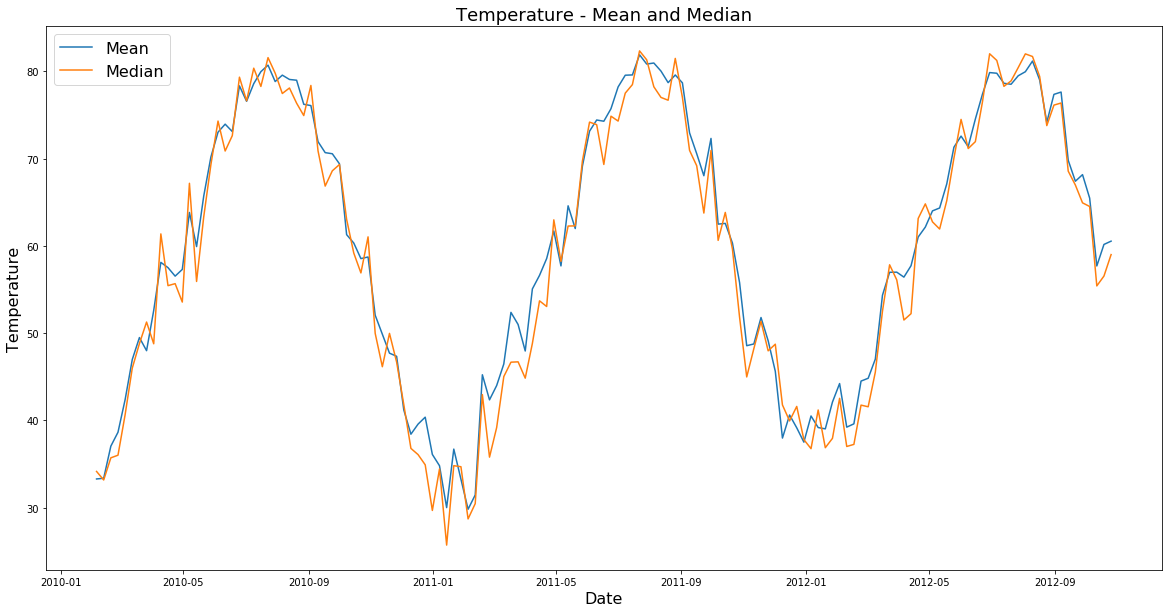

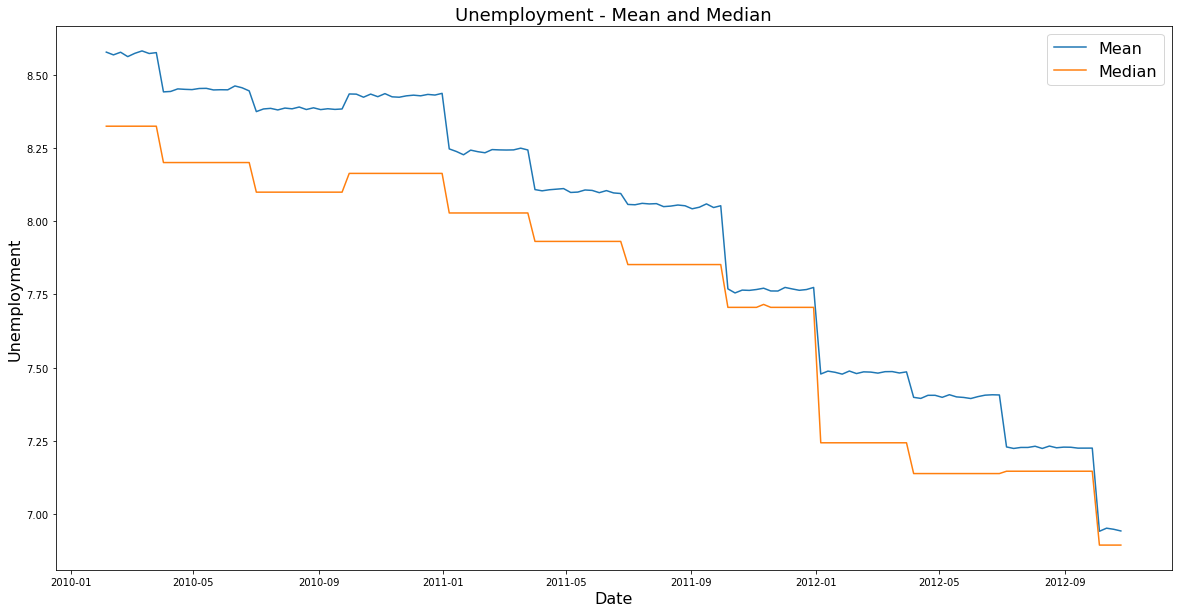

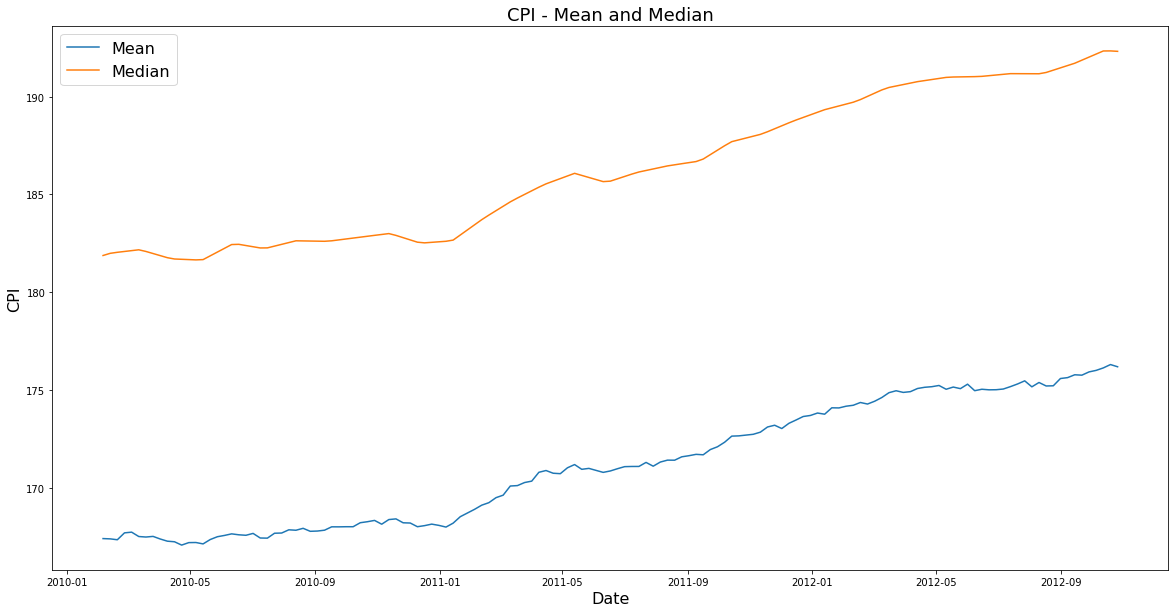

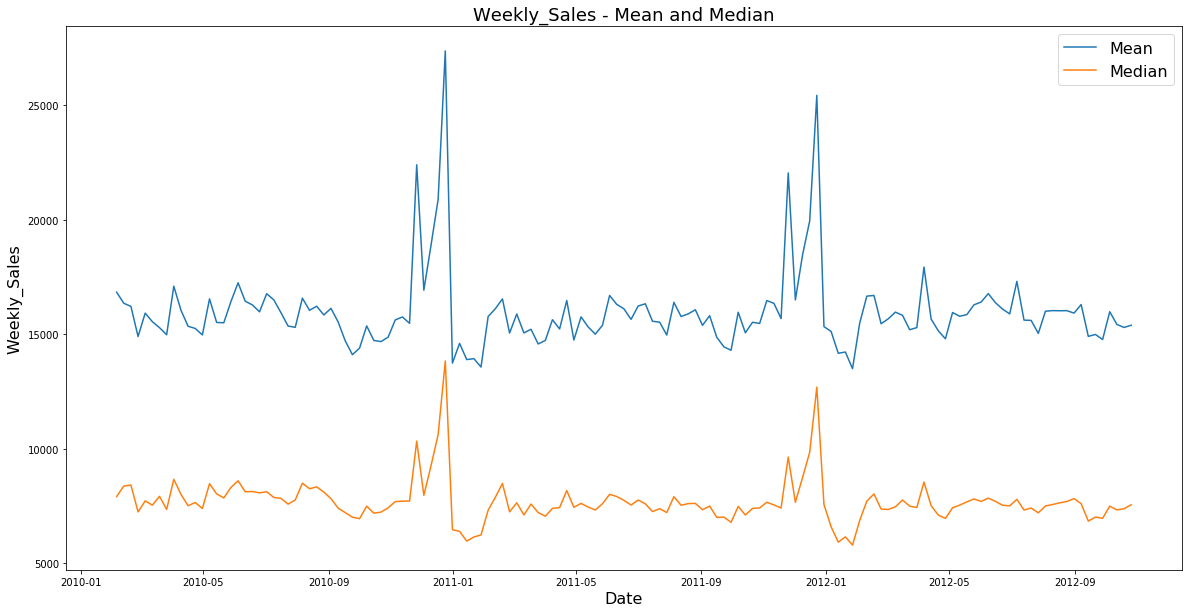

In [9]:
def check1(combine, column):    
    weekly_sales_mean = combine[column].groupby(combine['Date']).mean()
    weekly_sales_median = combine[column].groupby(combine['Date']).median()
    plt.figure(figsize=(20,10))
    sea.lineplot(weekly_sales_mean.index, weekly_sales_mean.values)
    sea.lineplot(weekly_sales_median.index, weekly_sales_median.values)
    plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
    plt.title('{} - Mean and Median'.format(column), fontsize=18)
    plt.ylabel(column, fontsize=16)
    plt.xlabel('Date', fontsize=16)
    plt.show()
    
check1(combine, "Fuel_Price")
check1(combine, "Temperature")
check1(combine, "Unemployment")
check1(combine, "CPI")
check1(combine, "Weekly_Sales")

### Conclusion1 : We see that Fuel_price median and mean overlap so we can drop it...and same for Unemployment and Temperature

### Observation4 : We see skewness in CPI and Weekly_Sales....and a little in Unemployment

In [10]:
def check(combine,column):
    #Reshaping Data
    X = np.array(combine[column]).reshape((-1,1))
    y = np.array(combine["Weekly_Sales"]).reshape((-1,1))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
    #Linear
    lrr = linear_model.LinearRegression()
    #lrr=PolynomialFeatures(2)
    lrr.fit(X_train, y_train)
    prediction = lrr.predict(X_test)
    plt.scatter(X_test, y_test)       #to print scatter plot
    plt.plot(X_test, prediction, color='red', linewidth=3)   #to print line
    plt.xlabel(column)
    plt.ylabel('Sales')
    plt.title('Linear Regression')
    plt.show()

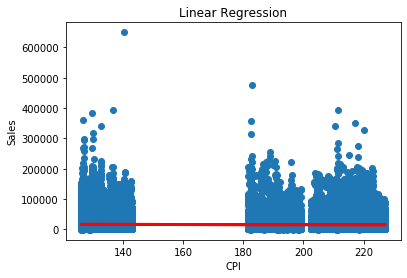

In [11]:
check(combine, "CPI")

### Conclusion2 : The skew is due to the gap as formed in CPI also we see no pattern so we can DROP it

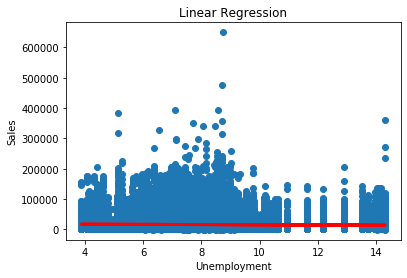

In [12]:
check(combine, "Unemployment")

In [13]:
print(np.var(combine["Unemployment"]))

3.4718638912525743


### Conclusion3 :-  For Unemployment we see no Pattern and also very low variance

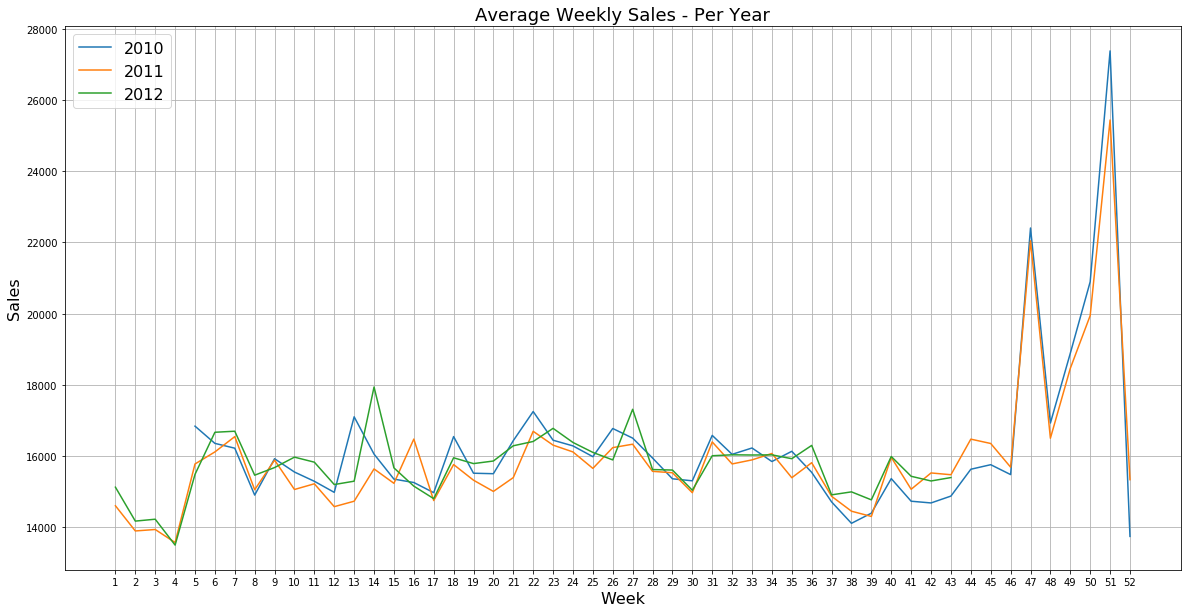

In [14]:
weekly_sales_2010 = combine[combine.Year==2010]['Weekly_Sales'].groupby(combine['Week']).mean()
weekly_sales_2011 = combine[combine.Year==2011]['Weekly_Sales'].groupby(combine['Week']).mean()
weekly_sales_2012 = combine[combine.Year==2012]['Weekly_Sales'].groupby(combine['Week']).mean()
plt.figure(figsize=(20,10))
sea.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sea.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sea.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(range(1,53))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

### Observation5 : We see same trend of graph for all 3 years so we can make an assumption that Year is not need to analyse trend

### Obervation6 : 52nd - Christmas///47th -"ThanksGiving" and "Black Friday Sale"///13th-16th-14th-"Easter Day" https://www.timeanddate.com/holidays/us/ used this site for details..

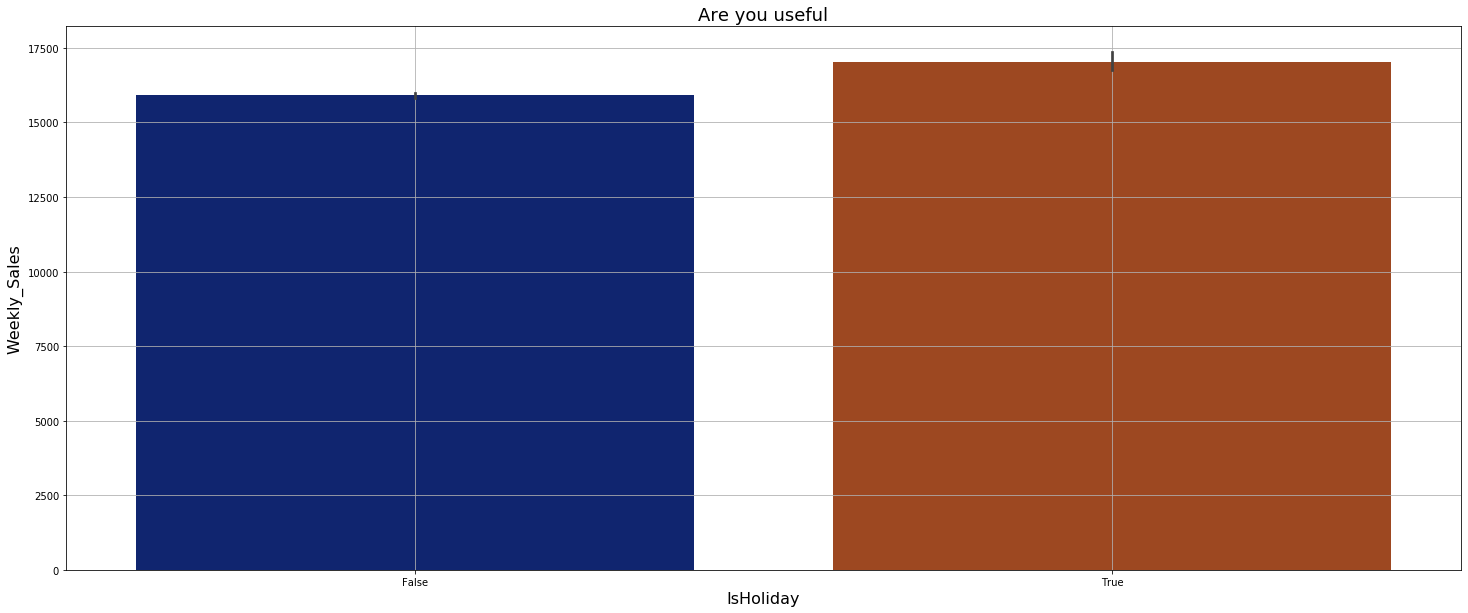

In [15]:
def bar(combine, x, y):
    plt.figure(figsize=(25,10))
    sea.barplot(combine[x], combine[y], palette='dark')
    plt.grid()
    plt.title('Are you useful', fontsize=18)
    plt.ylabel(y, fontsize=16)
    plt.xlabel(x, fontsize=16)
    plt.show()

bar(combine, 'IsHoliday', 'Weekly_Sales')

In [16]:
combine["IsHoliday"].value_counts(normalize=True)*100

False    92.964158
True      7.035842
Name: IsHoliday, dtype: float64

### Obervation7 : IsHoliday Is an important feature and will use this later in Model optimization

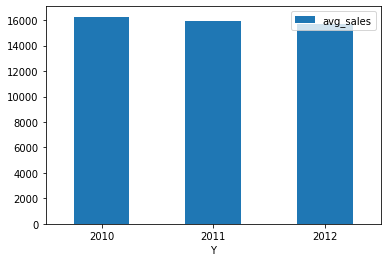

In [17]:
avg_sales=[]
Y=list(combine.Year.unique())

for year in Y:
    t=combine[combine['Year']==year]
    year_mean= (t['Weekly_Sales']).mean()
    avg_sales.append(year_mean)
    

df = pd.DataFrame({'Y':Y, 'avg_sales':avg_sales})
df.plot.bar(x='Y', y='avg_sales', rot=0)

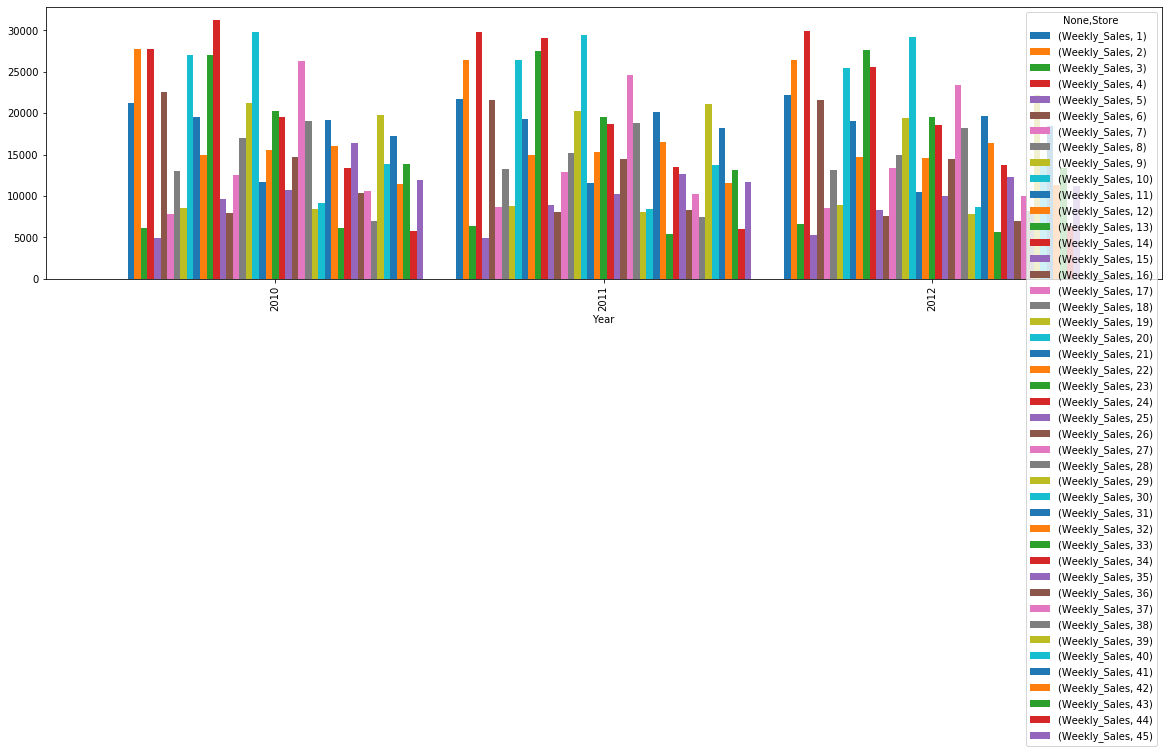

In [18]:
t=combine[['Store','Weekly_Sales','Year']].groupby(['Store','Year']).mean().unstack(0)
t.plot.bar(figsize=(20,5),width=0.9)

### Conclusion4 : We see same and same trends in Sales following for Different Years so We can DROP Year

In [24]:
#'MarkDown' 1 to 5 are not strong correlated to 'Weekly_Sales' and they have a lot of null values, then we can drop them.
combine = combine.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],errors='ignore')

#We can also Drop the Fuel Value as its correlation is almost 0
combine = combine.drop(columns="Fuel_Price", errors='ignore')

#Also We see that CPI and Unemployment have good correlation and both have a bad correlation with Weekly_Sales
#Also by using educated guess we know that CPI is inflation rate and the Unemployement both will not have a significant impact on Sales
combine = combine.drop(columns=["CPI","Unemployment","Temperature","Year","Date"], errors='ignore')
combine

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Week
0,1,1,24924.50,False,A,151315,5
1,1,2,50605.27,False,A,151315,5
2,1,3,13740.12,False,A,151315,5
3,1,4,39954.04,False,A,151315,5
4,1,5,32229.38,False,A,151315,5
...,...,...,...,...,...,...,...
421565,45,93,2487.80,False,B,118221,43
421566,45,94,5203.31,False,B,118221,43
421567,45,95,56017.47,False,B,118221,43
421568,45,97,6817.48,False,B,118221,43


In [20]:
def avg_bar(combine, column):
    weekly_sales = combine['Weekly_Sales'].groupby(combine[column]).mean()
    plt.figure(figsize=(25,10))
    sea.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
    plt.grid()
    plt.title('Average Sales - per {}'.format(column), fontsize=18)
    plt.ylabel('Sales', fontsize=16)
    plt.xlabel('{}'.format(column), fontsize=16)
    plt.show()

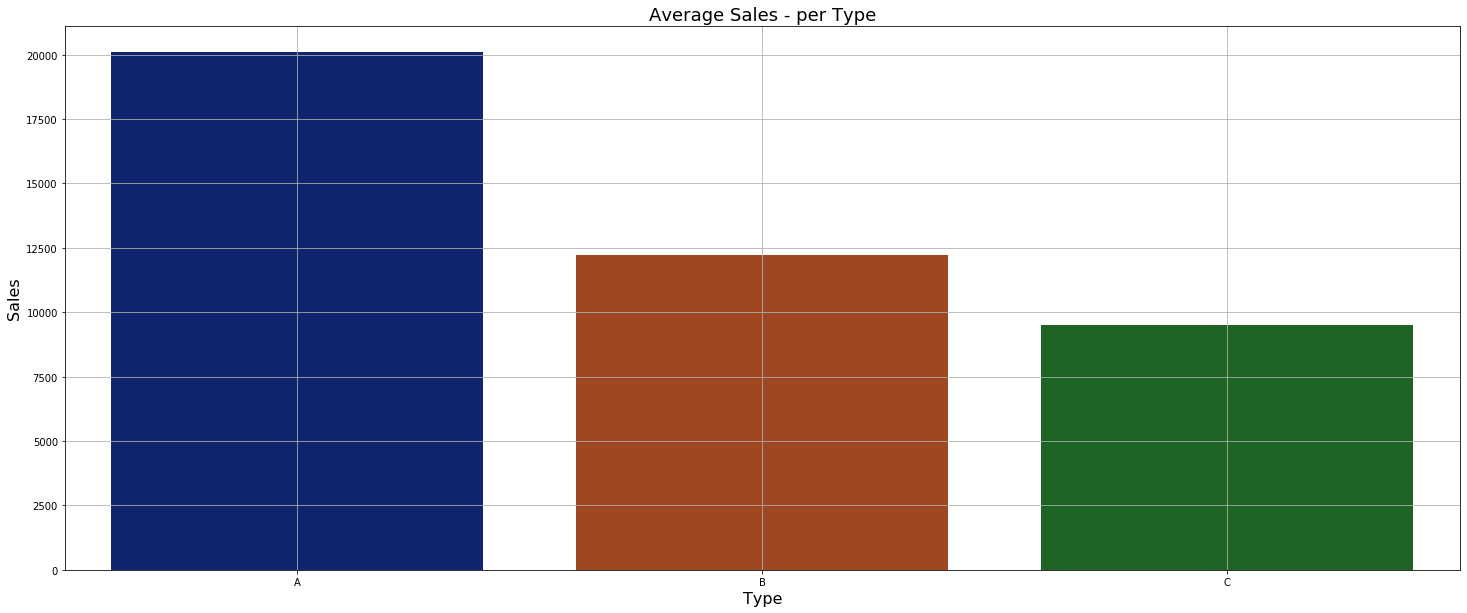

In [21]:
avg_bar(combine, 'Type')

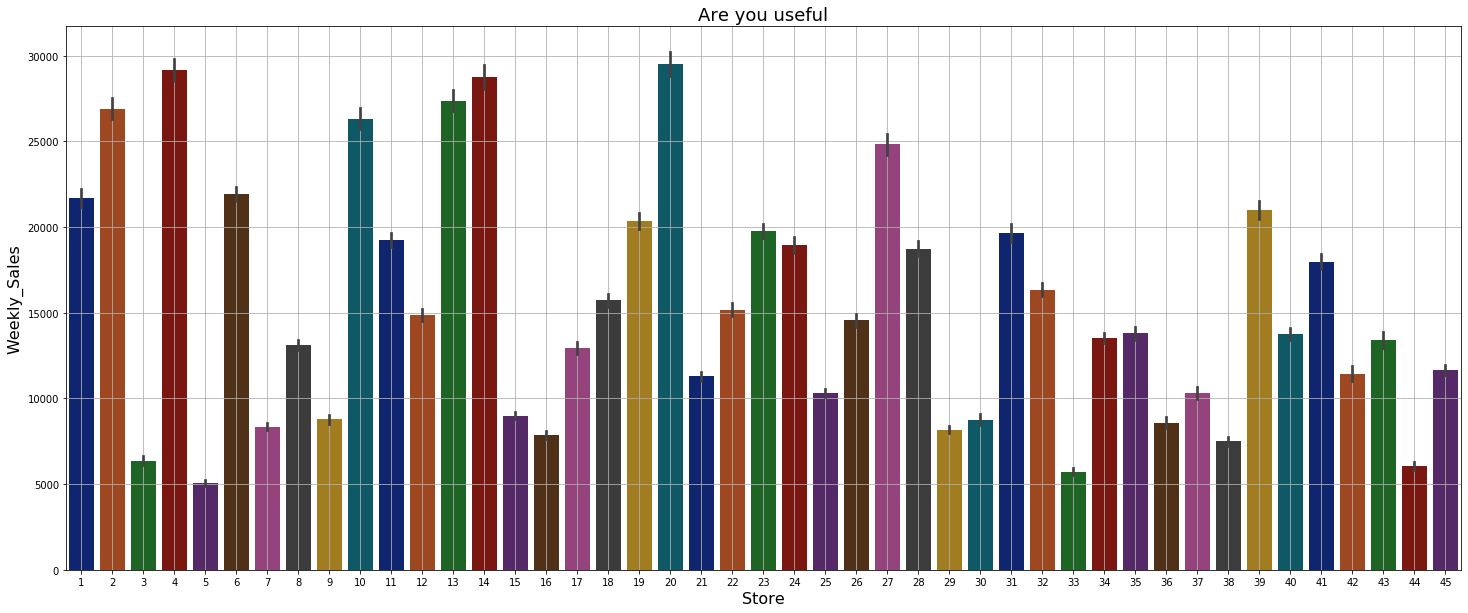

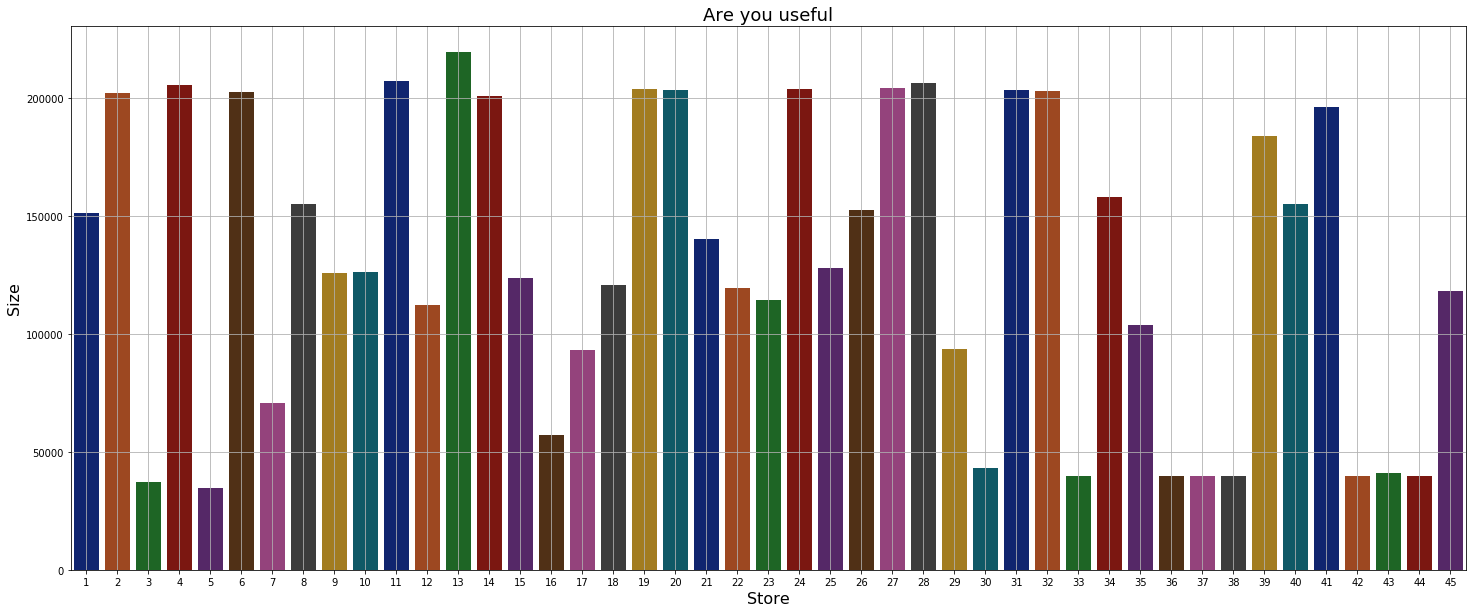

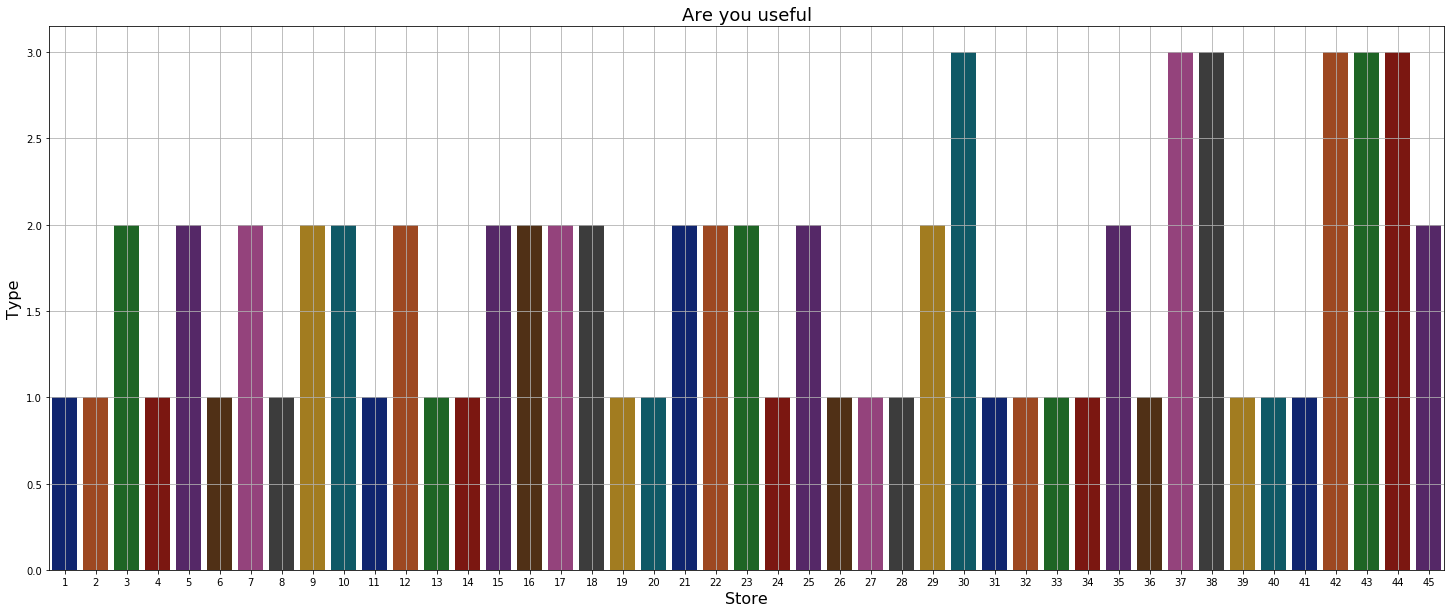

In [22]:
bar(combine, 'Store', 'Weekly_Sales')
bar(combine, 'Store', 'Size')
bar(store_dummy, 'Store', 'Type')

### Conclusion5 : We can say that Size also plays a major role in Weekly_Sales

### Observation10 : We can now say that due to Size of Store-C the Average Sales is Low

In [23]:
avg_bar(combine, 'Dept')

SyntaxError: invalid syntax (<ipython-input-23-7f2fe99d91ef>, line 1)

### Obervation8 : We can see many departments to have low Sales and Some having very high this caused the skew which we Noticed earlier

In [ ]:
g = sea.FacetGrid(combine, hue="Dept",col="Type")
g.map(plt.scatter, "Store", "Weekly_Sales", alpha=.7)
g.add_legend();

### Observation11 : Even though its Size is less Almost all departments are present in it so we can say Store-C is located in rural areas

In [ ]:
g = sea.FacetGrid(combine, hue="Type",col="Dept")
g.map(plt.scatter, "Store", "Weekly_Sales", alpha=.7)
g.add_legend();

In [ ]:
g = sea.FacetGrid(combine, hue="Type",height=4)
g.map(plt.scatter, "Week", "Weekly_Sales", alpha=.7)
g.add_legend();

In [ ]:
g = sea.FacetGrid(combine, hue="Type",height=4)
g.map(plt.scatter, "Dept", "Weekly_Sales", alpha=.7)
g.add_legend();

In [ ]:
g = sea.FacetGrid(combine, hue="Type",col="Dept")
g.map(plt.scatter, "Week", "Weekly_Sales", alpha=.7)
g.add_legend();